In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [3]:
import numpy as np

def generate_gaussian_kernel_2d(kernel_size, sigma):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(kernel_size-1)/2)**2 + (y-(kernel_size-1)/2)**2)/(2*sigma**2)), (kernel_size, kernel_size))
    return kernel / np.sum(kernel)

kernel_size = 3
sigma = 1.0
gaussian_kernel = generate_gaussian_kernel_2d(kernel_size, sigma)

In [4]:
gaussian_kernel

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [7]:
kernel_size = (3, 3)  # 设置滤波核的大小
sigma = 1.0  # 设置高斯核的标准差

gaussian_kernel = cv2.getGaussianKernel(kernel_size[0], sigma)  # 生成一维高斯核
gaussian_kernel_2d = np.outer(gaussian_kernel, gaussian_kernel)  #通过外积生成二维

In [8]:
gaussian_kernel_2d

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [9]:
gaussian_kernel_2d==gaussian_kernel

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

可视化展示

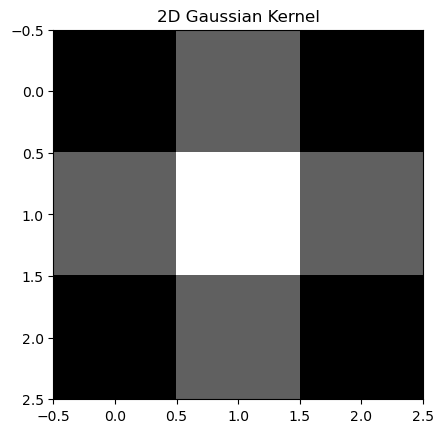

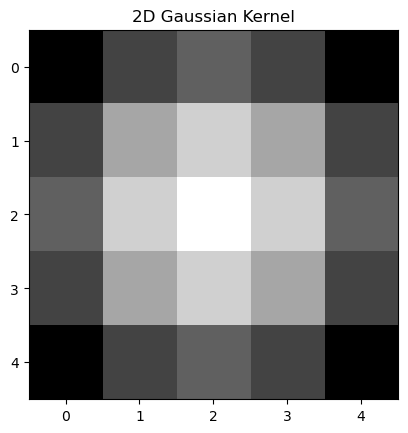

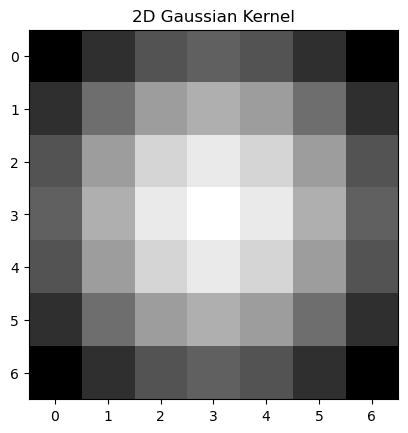

In [12]:
for size,sigma in zip([3,5,7],[1,2,3]):
    gaussian_kernel=cv2.getGaussianKernel(size,sigma)
    gaussian_kernel_2d=np.outer(gaussian_kernel,gaussian_kernel)

    plt.imshow(gaussian_kernel_2d, cmap='gray', interpolation='nearest')
    plt.title('2D Gaussian Kernel')
    plt.show()

滤波

In [23]:
img=cv2.imread("lena.png")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [20]:
def convolve2D(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    output = np.zeros_like(image)

    # 填充输入图像
    padded_image = np.pad(image, ((k_height//2, k_height//2), (k_width//2, k_width//2)), mode='constant')

    # 执行卷积
    for i in range(height):
        for j in range(width):
            output[i, j] = np.sum(padded_image[i:i+k_height, j:j+k_width] * kernel)

    return output

In [21]:
output=convolve2D(img,gaussian_kernel)

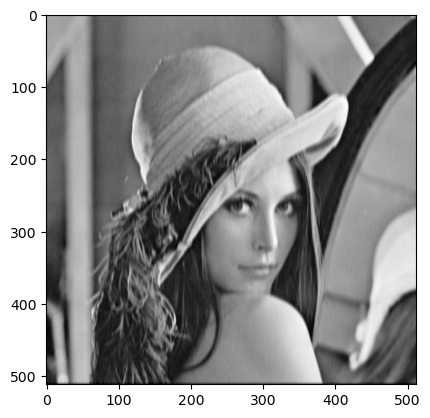

In [22]:
plt.imshow(output,cmap='gray')

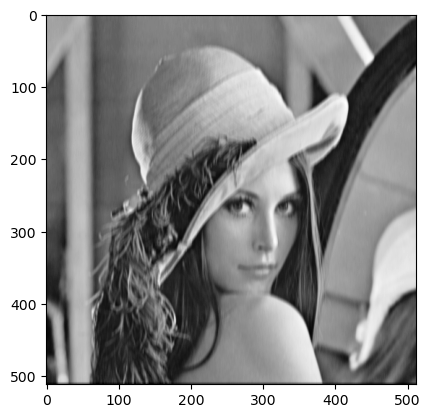

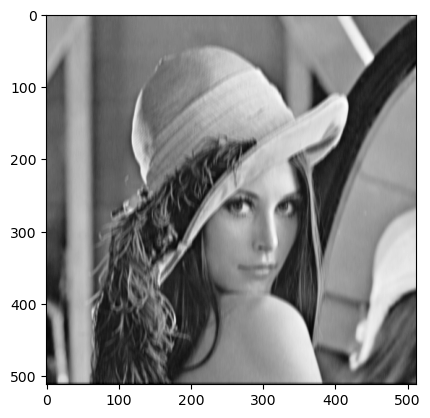

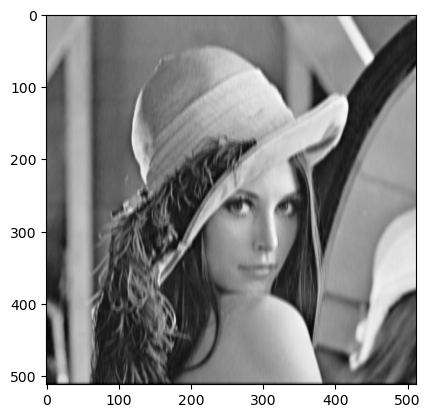

In [26]:
#应用多个不同的滤波核
size=7
for sigma in [5,9,13]:
    gaussian_kernel=cv2.getGaussianKernel(size,sigma)
    gaussian_kernel_2d=np.outer(gaussian_kernel,gaussian_kernel)

    output=convolve2D(img,gaussian_kernel)
    plt.imshow(output,cmap='gray')
    plt.show()